Name: Juliana CARVALHO DE SOUZA

**Master IASD/MASH**  
**Deep Learning for Image Analisis**

Practical Session #1

In this practical work we seek to compare the performance of different models in the supervised classification task.

Santiago VELASCO-FORERO

Santiago.Velasco@mines-paristech.fr

Deadline: Oct 10 / 2024

In [1]:
#pip install --upgrade keras
#import os
#os.environ["KERAS_BACKEND"] = "jax"
#os.environ["KERAS_BACKEND"] = "pytorch"
#os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import classification_report
print(keras.__version__)

3.4.1


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


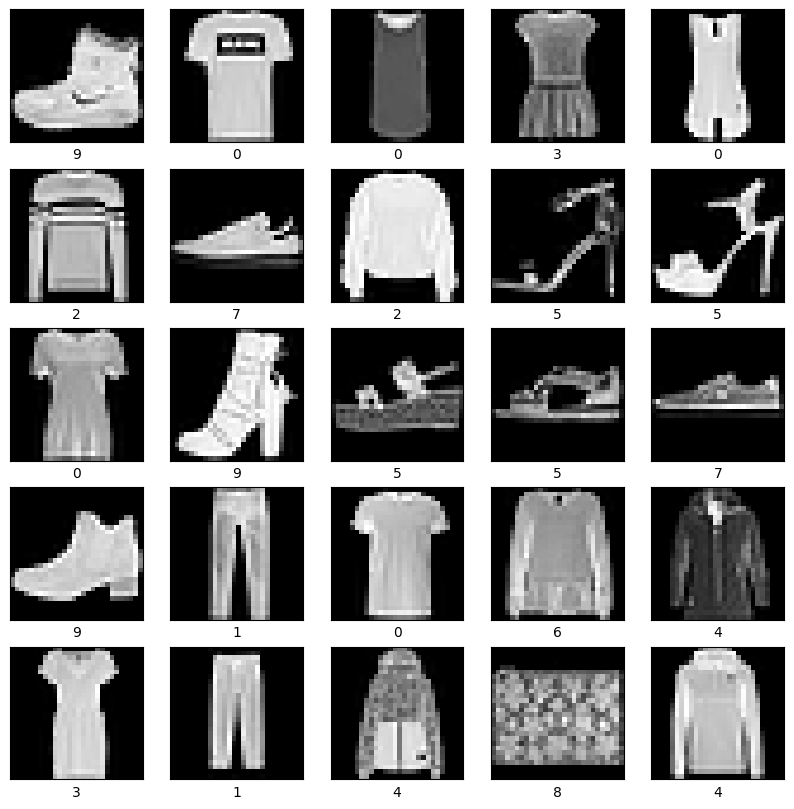

(28, 28)


In [2]:
#Fashion_MNIST
#https://en.wikipedia.org/wiki/Fashion_MNIST
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images=train_images/255.
test_images=test_images/255.

# Visualize some examples
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(train_labels[i])
plt.show()

print(train_images[i].shape)

In [3]:
input_shape=(28,28,1)
num_classes=10

def make_model(input_shape,num_classes):
  #input_shape: The shape of the input images, typically in the form (height, width, channels) where:
  #height is the image height,
  #width is the image width,
  #channels is the number of color channels (e.g., 3 for RGB images).
  #num_classes: The number of possible output categories (i.e., the number of classes for classification).
  input_layer=keras.Input(shape=input_shape)
  conv1=keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu")(input_layer)
  conv2=keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(conv1)
  pool=keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2))(conv2)
  conv3=keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(pool)
  conv4=keras.layers.Conv2D(96, kernel_size=(3, 3), activation="relu")(conv3)
  globalpool=keras.layers.GlobalAveragePooling2D()(conv4)
  dense = keras.layers.Dense(num_classes, activation="softmax")(globalpool)
  return keras.Model(input_layer,dense)

In [4]:
model0 = make_model(input_shape,num_classes)
model0.summary()
optimizer = keras.optimizers.SGD(learning_rate=1.)
model0.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 96)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,658 (311.16 KB)

 Trainable params: 79,658 (311.16 KB)

 Non-trainable params: 0 (0.00 B)

Question 1: Explain for each layer how the number of parameters is calculated.






Answer 1: Include your answer here.



1.   Layer 1: 16x(3x3+1) (16 output channels, each one is the result of the 3x3 convolution, and we add 1 extra parameter as bias in the linear model)
2.   Layer 2: 32x(16x(3x3)+1): each neuron (32) in the 2nd layer is formed by the convolution (3x3) applied to each channel of the previous layer (16) plus the bias (1) parameter.
3. MaxPooling: 0 parameter as each is just applying the max operation.
4. Layer 3: 64x(32x(3x3)+1): each of the 64 neurons in the 3rd layer is the result of the convolution of a (3x3) filter on each of the 32 channels of the previous layer, and a bias (1) is added to the linear model.
5. Layer 4: 96x(64x(3x3)+1): each of the 96 channels in the 4th layer is the result of the (3x3) convolution applied to each of the 64 channels of the last layer plus a bias (1) to the linear model.
6. No parameters, because it is just an average operation
7. Dense layer: 10x(96+1): on the dense layer, each of the 10 neurons is the result of 96 weights from the previous layer's neurons plus one bias.

The total of parameters is the sum of each of those layers, which gives:


*   16x(3x3+1)+ 32x(16x(3x3)+1) +  64x(32x(3x3)+1) + 96x(64x(3x3)+1) + 10x(96+1) = 79658

In [5]:
num_epochs=36
history_model0 = model0.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
    )

Epoch 1/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.1020 - loss: 2.3142 - val_accuracy: 0.1005 - val_loss: 2.3096
Epoch 2/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.1038 - loss: 2.3094 - val_accuracy: 0.1003 - val_loss: 2.3123
Epoch 3/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1015 - loss: 2.3104 - val_accuracy: 0.1013 - val_loss: 2.3121
Epoch 4/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0977 - loss: 2.3104 - val_accuracy: 0.1005 - val_loss: 2.3094
Epoch 5/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0992 - loss: 2.3096 - val_accuracy: 0.0983 - val_loss: 2.3085
Epoch 6/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1027 - loss: 2.3102 - val_accuracy: 0.0957 - val_loss: 2.3099
Epoch 7/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.0970 - loss: 2.3101 - val_accuracy: 0.0983 - val_loss: 2.3081
Epoch 8/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0992 - loss: 2.3102 

In [6]:
def make_plot_history(history):
  #Visualize the training process of a neural network by plotting the accuracy and loss over the training epochs for both the training set and validation set.
  #It uses Matplotlib, a popular plotting library in Python, to generate two subplots: one for accuracy and one for loss.
  plt.figure()
  plt.subplot(2,1,1)
  plt.plot(history.history['accuracy'],label='Training')
  plt.plot(history.history['val_accuracy'],label='Validation')
  plt.grid('on')
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.subplot(2,1,2)
  plt.plot(history.history['loss'],label='Training')
  plt.plot(history.history['val_loss'],label='Validation')
  plt.grid('on')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

def make_model_analysis(model,x_test,y_test):
  #Function is designed to evaluate a trained neural network model by predicting the classes of test data (x_test) and comparing them to the true labels (y_test).
  #It also generates a classification report that provides detailed performance metrics for each class.
  #classification_report: This function (from Scikit-learn) generates a detailed report of the model’s performance for each class. It includes the following metrics:
  #Precision: The ratio of true positive predictions to the total predicted positives.
  #Recall (Sensitivity): The ratio of true positive predictions to the total actual positives.
  #F1-score: The harmonic mean of precision and recall.
  #Support: The number of true instances for each class.
  y_pred=np.argmax(model.predict(x_test),axis=1)
  print(y_pred.shape)
  print('Predicted Classes', np.unique(y_pred))
  print('Truth Classes', np.unique(y_test))
  target_names = ['T-Shirt', 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
  print(classification_report(y_test,y_pred,target_names=target_names))

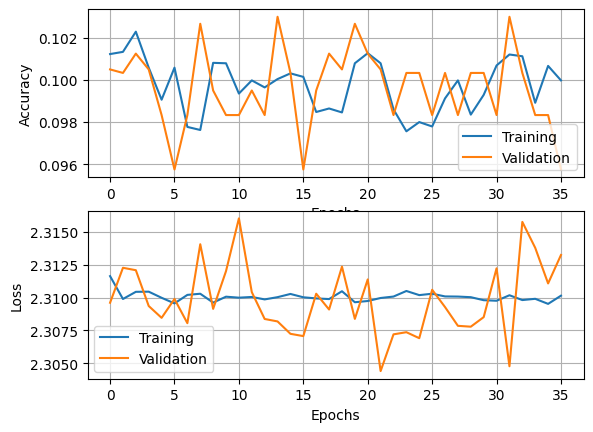

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
(10000,)
Predicted Classes [6]
Truth Classes [0 1 2 3 4 5 6 7 8 9]
              precision    recall  f1-score   support

     T-Shirt       0.00      0.00      0.00      1000
     Trouser       0.00      0.00      0.00      1000
    Pullover       0.00      0.00      0.00      1000
       Dress       0.00      0.00      0.00      1000
        Coat       0.00      0.00      0.00      1000
      Sandal       0.00      0.00      0.00      1000
       Shirt       0.10      1.00      0.18      1000
     Sneaker       0.00      0.00      0.00      1000
         Bag       0.00      0.00      0.00      1000
  Ankle Boot       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
make_plot_history(history_model0)
make_model_analysis(model0,test_images,test_labels)

Note: The model is not learning.

Q1. Change the learning_rate to a value of 0.001 and train a new model. Call this new model: model1

In [8]:
#Your code for answer Q1:
model1 = make_model(input_shape,num_classes)
model1.summary()
optimizer = keras.optimizers.SGD(learning_rate=0.001)
model1.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 96)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,658 (311.16 KB)

 Trainable params: 79,658 (311.16 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history_model1 = model1.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
    )

Epoch 1/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1008 - loss: 2.3019 - val_accuracy: 0.1128 - val_loss: 2.2964
Epoch 2/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1339 - loss: 2.2948 - val_accuracy: 0.2219 - val_loss: 2.2870
Epoch 3/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2228 - loss: 2.2835 - val_accuracy: 0.1949 - val_loss: 2.2660
Epoch 4/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1884 - loss: 2.2571 - val_accuracy: 0.2005 - val_loss: 2.2120
Epoch 5/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2554 - loss: 2.1885 - val_accuracy: 0.4305 - val_loss: 2.0570
Epoch 6/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4699 - loss: 1.9369 - val_accuracy: 0.5258 - val_loss: 1.3594
Epoch 7/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5688 - loss: 1.2187 - val_accuracy: 0.6018 - val_loss: 1.0334
Epoch 8/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6091 - loss: 1.0212 - 

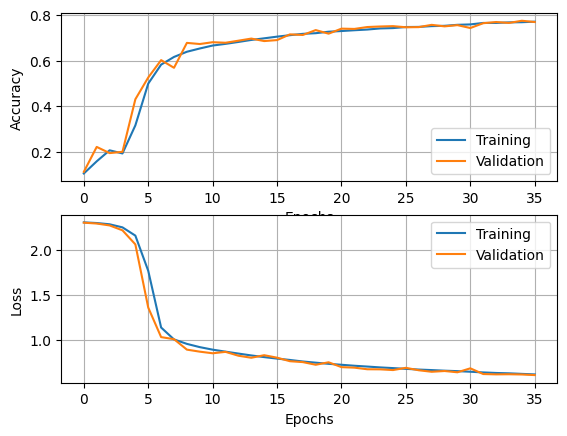

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000,)
Predicted Classes [0 1 2 3 4 5 6 7 8 9]
Truth Classes [0 1 2 3 4 5 6 7 8 9]
              precision    recall  f1-score   support

     T-Shirt       0.76      0.74      0.75      1000
     Trouser       0.98      0.91      0.94      1000
    Pullover       0.49      0.77      0.60      1000
       Dress       0.76      0.80      0.78      1000
        Coat       0.61      0.53      0.56      1000
      Sandal       0.90      0.92      0.91      1000
       Shirt       0.41      0.23      0.30      1000
     Sneaker       0.86      0.90      0.88      1000
         Bag       0.91      0.92      0.92      1000
  Ankle Boot       0.95      0.90      0.92      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



In [10]:
make_plot_history(history_model1)
make_model_analysis(model1,test_images,test_labels)

Q2. Change the optimizer from SGD to Adam. Call this model as "model2".

In [11]:
#Your code for answer Q2:
model2 = make_model(input_shape,num_classes)
model2.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 96)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,658 (311.16 KB)

 Trainable params: 79,658 (311.16 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history_model2 = model2.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
    )

Epoch 1/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6349 - loss: 0.9901 - val_accuracy: 0.8048 - val_loss: 0.5346
Epoch 2/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8112 - loss: 0.5209 - val_accuracy: 0.8375 - val_loss: 0.4608
Epoch 3/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8494 - loss: 0.4262 - val_accuracy: 0.8643 - val_loss: 0.3797
Epoch 4/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8654 - loss: 0.3711 - val_accuracy: 0.8692 - val_loss: 0.3545
Epoch 5/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8785 - loss: 0.3376 - val_accuracy: 0.8817 - val_loss: 0.3305
Epoch 6/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8894 - loss: 0.3051 - val_accuracy: 0.8884 - val_loss: 0.3122
Epoch 7/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8978 - loss: 0.2839 - val_accuracy: 0.8923 - val_loss: 0.2890
Epoch 8/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9044 - loss: 0.2667 - 

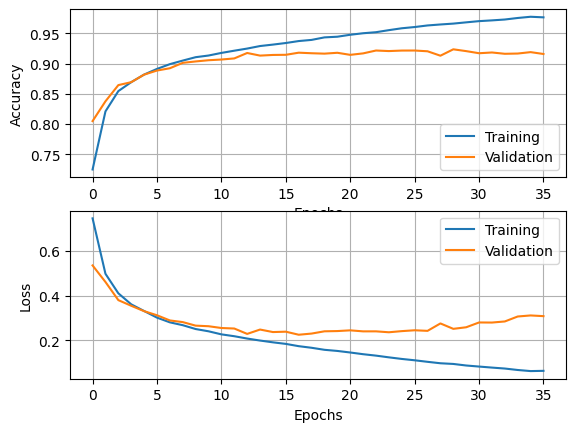

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000,)
Predicted Classes [0 1 2 3 4 5 6 7 8 9]
Truth Classes [0 1 2 3 4 5 6 7 8 9]
              precision    recall  f1-score   support

     T-Shirt       0.83      0.89      0.86      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.90      0.85      0.88      1000
       Dress       0.91      0.91      0.91      1000
        Coat       0.83      0.90      0.86      1000
      Sandal       0.96      0.99      0.98      1000
       Shirt       0.80      0.71      0.75      1000
     Sneaker       0.97      0.95      0.96      1000
         Bag       0.97      0.99      0.98      1000
  Ankle Boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [13]:
make_plot_history(history_model2)
make_model_analysis(model2,test_images,test_labels)

Q3: What is your analysis about the performance of Model2?

Answer Q3:

Model2 presented a better performance than Model0 and Model1.

When compared to model 0, model 2 presents a higher accuracy (91% for model 2, vs 10% for model 0) and is learning to optimize the loss function thanks to a smaller learning rate (0.001 instead of 1) and to the use of Adam optimizer instead of the simple SGD optimizer algorithm.

Compared to model 1, model 2 presents a better accuracy (91% for model 2 vs 76% for model 2) thanks to the use of the Adam optimizer, which adds the momentum and RMSprop to SGD. To compare, at the end of trainning, the validation loss on the model1 is higher (0.59) than in model2 (0.32) after applying the same number of epochs (36).

Q4: Create you create a function "make_model_with_layer_normalization" to define a model as before but adding "LayerNormalization" layer in between each Conv2D and Activation layer. Call this model as "model3"

In [14]:
#Your code for answer Q4:
def make_model_with_layer_normalization(input_shape,num_classes):
  input_layer=keras.Input(shape=input_shape)

  # conv1=keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu")(input_layer)
  conv1 = keras.layers.Conv2D(16, kernel_size=(3, 3))(input_layer)
  norm1 = keras.layers.LayerNormalization()(conv1)
  act1 = keras.layers.Activation("relu")(norm1)

  # conv2=keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(conv1)
  conv2 = keras.layers.Conv2D(32, kernel_size=(3, 3))(act1)
  norm2 = keras.layers.LayerNormalization()(conv2)
  act2 = keras.layers.Activation("relu")(norm2)

  # pool=keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2))(conv2)
  pool = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(act2)

  # conv3=keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(pool)
  conv3 = keras.layers.Conv2D(64, kernel_size=(3, 3))(pool)
  norm3 = keras.layers.LayerNormalization()(conv3)
  act3 = keras.layers.Activation("relu")(norm3)

  # conv4=keras.layers.Conv2D(96, kernel_size=(3, 3), activation="relu")(conv3)
  conv4 = keras.layers.Conv2D(96, kernel_size=(3, 3))(act3)
  norm4 = keras.layers.LayerNormalization()(conv4)
  act4 = keras.layers.Activation("relu")(norm4)

  # globalpool=keras.layers.GlobalAveragePooling2D()(conv4)
  globalpool = keras.layers.GlobalAveragePooling2D()(act4)

  dense = keras.layers.Dense(num_classes, activation="softmax")(globalpool)
  return keras.Model(input_layer,dense)

In [15]:
model3 = make_model_with_layer_normalization(input_shape,num_classes)
model3.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model3.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization                  │ (None, 26, 26, 16)          │              32 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_1                │ (None, 24, 24, 32)          │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_2                │ (None, 10, 10, 64)          │             128 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 8, 8, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_3                │ (None, 8, 8, 96)            │             192 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 8, 8, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 96)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,074 (312.79 KB)

 Trainable params: 80,074 (312.79 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history_model3 = model3.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
    )

Epoch 1/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6895 - loss: 0.8713 - val_accuracy: 0.8320 - val_loss: 0.4519
Epoch 2/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8417 - loss: 0.4338 - val_accuracy: 0.8648 - val_loss: 0.3651
Epoch 3/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8700 - loss: 0.3576 - val_accuracy: 0.8852 - val_loss: 0.3196
Epoch 4/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8862 - loss: 0.3167 - val_accuracy: 0.8911 - val_loss: 0.3012
Epoch 5/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8940 - loss: 0.2873 - val_accuracy: 0.8893 - val_loss: 0.3007
Epoch 6/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9020 - loss: 0.2705 - val_accuracy: 0.8997 - val_loss: 0.2695
Epoch 7/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9093 - loss: 0.2555 - val_accuracy: 0.9060 - val_loss: 0.2600
Epoch 8/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9120 - loss: 0.2394

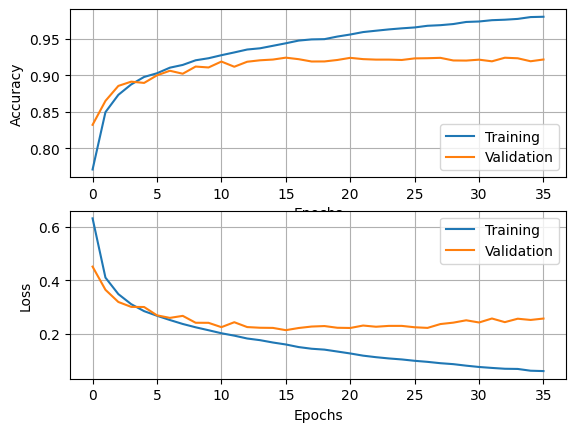

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
(10000,)
Predicted Classes [0 1 2 3 4 5 6 7 8 9]
Truth Classes [0 1 2 3 4 5 6 7 8 9]
              precision    recall  f1-score   support

     T-Shirt       0.86      0.86      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.90      0.88      0.89      1000
       Dress       0.89      0.94      0.91      1000
        Coat       0.86      0.90      0.88      1000
      Sandal       0.98      0.99      0.99      1000
       Shirt       0.80      0.72      0.76      1000
     Sneaker       0.96      0.97      0.97      1000
         Bag       0.97      0.99      0.98      1000
  Ankle Boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [17]:
make_plot_history(history_model3)
make_model_analysis(model3,test_images,test_labels)

Text(0, 0.5, 'Validation Accuracy')

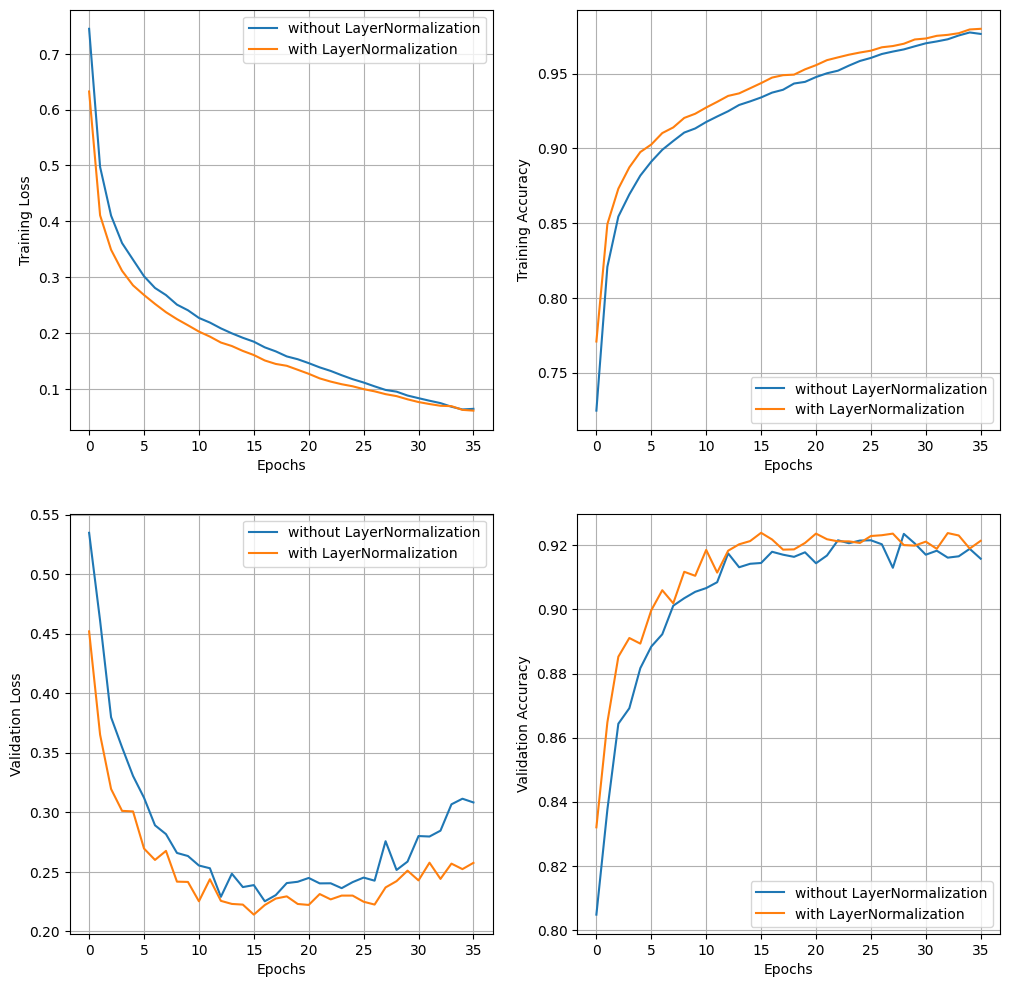

In [18]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.plot(history_model2.history['loss'],label='without LayerNormalization')
plt.plot(history_model3.history['loss'],label='with LayerNormalization')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.subplot(2,2,2)
plt.plot(history_model2.history['accuracy'],label='without LayerNormalization')
plt.plot(history_model3.history['accuracy'],label='with LayerNormalization')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.subplot(2,2,3)
plt.plot(history_model2.history['val_loss'],label='without LayerNormalization')
plt.plot(history_model3.history['val_loss'],label='with LayerNormalization')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.subplot(2,2,4)
plt.plot(history_model2.history['val_accuracy'],label='without LayerNormalization')
plt.plot(history_model3.history['val_accuracy'],label='with LayerNormalization')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')

Q5: What is your analysis about the performance of Model3?

Answer Q5:

Model 3, with layer normalization, at the end of the epochs achieves a smaller (trainning and validation) loss, and a higher (trainning and validation) accuracy when compared to model2, without layer normalization.

- The reason is that Layer Normalization acte before activation function, normalizing each feature of the
activations to zero mean and unit variance. Then, the activation applied next can perform better with values moved to close to 0.

- The normalization also avoids the gradient vanishing phenomenon and accelerate the convergence, which in the same number of epoches, is expected to result in a better performance than the optimization without normalization.

- Also, with the layer normalization, the gradient propagates more stable, results in slightly aparent more smooth curves on the graphs.

Q6: Create you create a function "make_model_with_layer_normalization_and_dropout" to define a model as before but including a dropout layer after global pooling. Call this model as "model4"

In [19]:
#Your code for answer Q6:
def make_model_with_layer_normalization_and_dropout(input_shape,num_classes):
  input_layer=keras.Input(shape=input_shape)

  conv1 = keras.layers.Conv2D(16, kernel_size=(3, 3))(input_layer)
  norm1 = keras.layers.LayerNormalization()(conv1)
  act1 = keras.layers.Activation("relu")(norm1)

  conv2 = keras.layers.Conv2D(32, kernel_size=(3, 3))(act1)
  norm2 = keras.layers.LayerNormalization()(conv2)
  act2 = keras.layers.Activation("relu")(norm2)

  pool = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(act2)

  conv3 = keras.layers.Conv2D(64, kernel_size=(3, 3))(pool)
  norm3 = keras.layers.LayerNormalization()(conv3)
  act3 = keras.layers.Activation("relu")(norm3)

  conv4 = keras.layers.Conv2D(96, kernel_size=(3, 3))(act3)
  norm4 = keras.layers.LayerNormalization()(conv4)
  act4 = keras.layers.Activation("relu")(norm4)

  globalpool = keras.layers.GlobalAveragePooling2D()(act4)

  # Dropout after globalpool
  globalpool=keras.layers.Dropout(.1)(globalpool)
  dense = keras.layers.Dense(num_classes, activation="softmax")(globalpool)
  return keras.Model(input_layer,dense)

In [20]:
model4 = make_model_with_layer_normalization_and_dropout(input_shape,num_classes)
model4.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model4.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_4                │ (None, 26, 26, 16)          │              32 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_5                │ (None, 24, 24, 32)          │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_6                │ (None, 10, 10, 64)          │             128 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 8, 8, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_7                │ (None, 8, 8, 96)            │             192 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 8, 8, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 96)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,074 (312.79 KB)

 Trainable params: 80,074 (312.79 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history_model4 = model4.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
    )

Epoch 1/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6790 - loss: 0.9042 - val_accuracy: 0.8271 - val_loss: 0.4640
Epoch 2/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8328 - loss: 0.4604 - val_accuracy: 0.8668 - val_loss: 0.3693
Epoch 3/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8589 - loss: 0.3845 - val_accuracy: 0.8761 - val_loss: 0.3381
Epoch 4/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8757 - loss: 0.3410 - val_accuracy: 0.8799 - val_loss: 0.3314
Epoch 5/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8863 - loss: 0.3109 - val_accuracy: 0.8974 - val_loss: 0.2859
Epoch 6/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8955 - loss: 0.2893 - val_accuracy: 0.9008 - val_loss: 0.2766
Epoch 7/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9015 - loss: 0.2734 - val_accuracy: 0.9072 - val_loss: 0.2588
Epoch 8/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9066 - loss: 0.2600

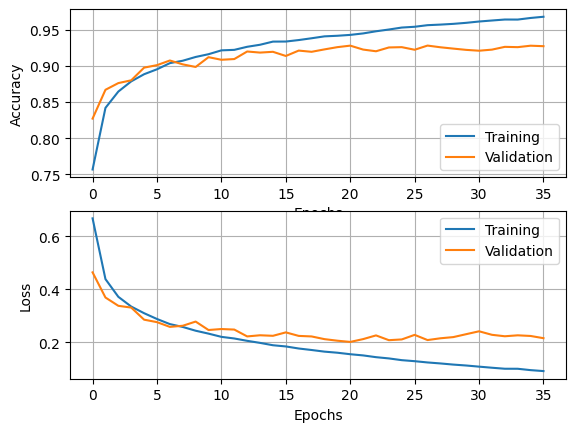

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000,)
Predicted Classes [0 1 2 3 4 5 6 7 8 9]
Truth Classes [0 1 2 3 4 5 6 7 8 9]
              precision    recall  f1-score   support

     T-Shirt       0.90      0.83      0.87      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.88      0.90      0.89      1000
       Dress       0.90      0.93      0.91      1000
        Coat       0.88      0.87      0.87      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.75      0.78      0.77      1000
     Sneaker       0.96      0.97      0.97      1000
         Bag       0.99      0.98      0.98      1000
  Ankle Boot       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [22]:
make_plot_history(history_model4)
make_model_analysis(model4,test_images,test_labels)

Q7: Select the best configuration and train this network for 128 epochs, including:
- A reduced learning rate and an early stopping callback.
- Save the best model.
- Plot the confusion matrix of the best model.
- Show examples where the network is not classifing correctly.

Help: https://keras.io/api/callbacks/


In [23]:
#Include the answer of the Q7

num_epochs=128

# model4 presents the greatest accuracy (a bit more than model 3) and the smallest loss.
model_best = model4
model_best.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_best.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_model5 = model_best.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
        callbacks=[reduce_lr,early_stopping]
    )




Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_4                │ (None, 26, 26, 16)          │              32 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_5                │ (None, 24, 24, 32)          │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_6                │ (None, 10, 10, 64)          │             128 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 8, 8, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_7                │ (None, 8, 8, 96)            │             192 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 8, 8, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 96)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 240,224 (938.38 KB)

 Trainable params: 80,074 (312.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160,150 (625.59 KB)

Epoch 1/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9673 - loss: 0.0912 - val_accuracy: 0.9183 - val_loss: 0.2452 - learning_rate: 0.0010
Epoch 2/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9693 - loss: 0.0865 - val_accuracy: 0.9219 - val_loss: 0.2373 - learning_rate: 0.0010
Epoch 3/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9716 - loss: 0.0805 - val_accuracy: 0.9255 - val_loss: 0.2360 - learning_rate: 0.0010
Epoch 4/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9734 - loss: 0.0765 - val_accuracy: 0.9178 - val_loss: 0.2563 - learning_rate: 0.0010
Epoch 5/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9741 - loss: 0.0729 - val_accuracy: 0.9208 - val_loss: 0.2413 - learning_rate: 0.0010
Epoch 6/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9760 - loss: 0.0716 - val_accuracy: 0.9216 - val_loss: 0.2493 - learning_rate: 0.0010
Epoch 7/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


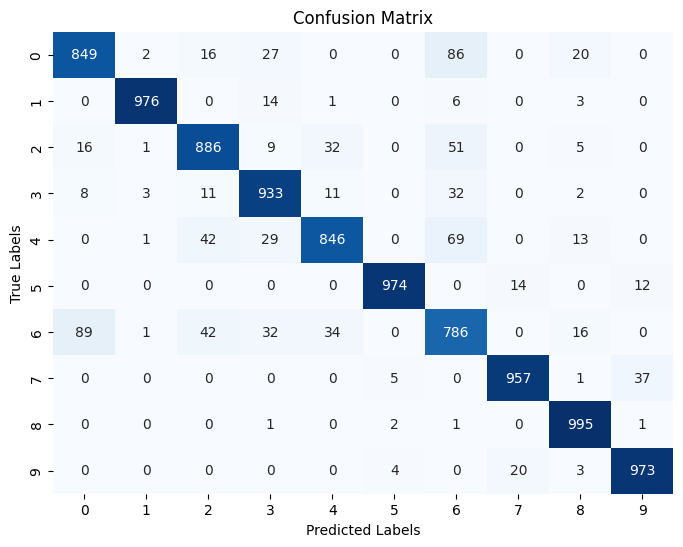

              precision    recall  f1-score   support

           0      0.883     0.849     0.865      1000
           1      0.992     0.976     0.984      1000
           2      0.889     0.886     0.887      1000
           3      0.893     0.933     0.912      1000
           4      0.916     0.846     0.879      1000
           5      0.989     0.974     0.981      1000
           6      0.762     0.786     0.774      1000
           7      0.966     0.957     0.961      1000
           8      0.940     0.995     0.967      1000
           9      0.951     0.973     0.962      1000

    accuracy                          0.917     10000
   macro avg      0.918     0.918     0.917     10000
weighted avg      0.918     0.917     0.917     10000



In [24]:
# save the best model
model_best.save('best_model.keras')

# plot the confusion matrix for model_best
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions from the best model on test set
predictions = np.argmax(model_best.predict(test_images), axis=1)

cm = confusion_matrix(test_labels, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()

# Optionally, you can also print a classification report
print(classification_report(test_labels, predictions, digits=3))


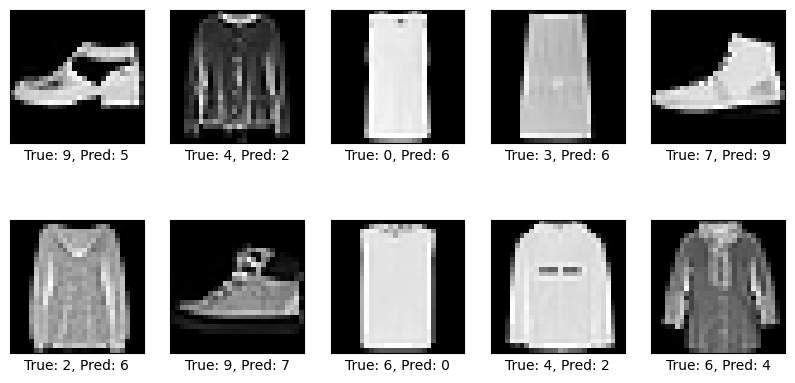

In [25]:
# Show examples where the network is not classifing correctly.
incorrect_predictions = np.where(predictions != test_labels)[0]

# plot the first 10 examples in a 2x5 matrix
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[incorrect_predictions[i]], cmap='gray')
    plt.xlabel(f"True: {test_labels[incorrect_predictions[i]]}, Pred: {predictions[incorrect_predictions[i]]}")
plt.show()

# Retraining best model using batch normalization layer intead of layer normalization:

In [26]:
def make_model_with_batch_normalization(input_shape,num_classes):
  input_layer=keras.Input(shape=input_shape)

  conv1 = keras.layers.Conv2D(16, kernel_size=(3, 3))(input_layer)
  norm1 = keras.layers.BatchNormalization()(conv1)
  act1 = keras.layers.Activation("relu")(norm1)

  conv2 = keras.layers.Conv2D(32, kernel_size=(3, 3))(act1)
  norm2 = keras.layers.BatchNormalization()(conv2)
  act2 = keras.layers.Activation("relu")(norm2)

  pool = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(act2)

  conv3 = keras.layers.Conv2D(64, kernel_size=(3, 3))(pool)
  norm3 = keras.layers.BatchNormalization()(conv3)
  act3 = keras.layers.Activation("relu")(norm3)

  conv4 = keras.layers.Conv2D(96, kernel_size=(3, 3))(act3)
  norm4 = keras.layers.BatchNormalization()(conv4)
  act4 = keras.layers.Activation("relu")(norm4)

  globalpool = keras.layers.GlobalAveragePooling2D()(act4)
  globalpool=keras.layers.Dropout(.1)(globalpool)
  dense = keras.layers.Dense(num_classes, activation="softmax")(globalpool)
  return keras.Model(input_layer,dense)

best_model2 = make_model_with_batch_normalization(input_shape,num_classes)
best_model2.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)

best_model2.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_model6 = best_model2.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
        callbacks=[reduce_lr,early_stopping]
    )



Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 10, 10, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 8, 8, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 96)            │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 8, 8, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 96)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,490 (314.41 KB)

 Trainable params: 80,074 (312.79 KB)

 Non-trainable params: 416 (1.62 KB)

Epoch 1/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7482 - loss: 0.7416 - val_accuracy: 0.8453 - val_loss: 0.4281 - learning_rate: 0.0010
Epoch 2/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8618 - loss: 0.3870 - val_accuracy: 0.8516 - val_loss: 0.4139 - learning_rate: 0.0010
Epoch 3/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8799 - loss: 0.3339 - val_accuracy: 0.8828 - val_loss: 0.3244 - learning_rate: 0.0010
Epoch 4/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8929 - loss: 0.3017 - val_accuracy: 0.8918 - val_loss: 0.3008 - learning_rate: 0.0010
Epoch 5/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9015 - loss: 0.2720 - val_accuracy: 0.8971 - val_loss: 0.2901 - learning_rate: 0.0010
Epoch 6/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9087 - loss: 0.2564 - val_accuracy: 0.9004 - val_loss: 0.2719 - learning_rate: 0.0010
Epoch 7/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0

In [27]:

# Optionally, you can also print a classification report

predictions = np.argmax(best_model2.predict(test_images), axis=1)
print(classification_report(test_labels, predictions, digits=3))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0      0.884     0.831     0.857      1000
           1      0.973     0.986     0.980      1000
           2      0.922     0.854     0.887      1000
           3      0.918     0.911     0.915      1000
           4      0.901     0.874     0.887      1000
           5      0.991     0.973     0.982      1000
           6      0.719     0.821     0.767      1000
           7      0.940     0.984     0.961      1000
           8      0.973     0.988     0.981      1000
           9      0.980     0.954     0.967      1000

    accuracy                          0.918     10000
   macro avg      0.920     0.918     0.918     10000
weighted avg      0.920     0.918     0.918     10000



# Other Questions:


## Q8.

 In your final model "model_best", retrain the model using "batch normalization layer" instead of "layer normalization".


a. Does this model get better results for this problem?

No, this model with **batch normalization layer** produces a slightly smaller accuracy (0.918 vs 0.921 from the model_best), and a worse final loss (0.2897 vs  0.2585) for validation set.


b. Explain why the model with Batch Normalization has fewer parameters than the one using Layer Normalization.


**Answer:**

Regarding the **Total Parameters** of the two models, we have:

- The Batch Normalization method applies the operation $\dfrac{x-\mu_{B,N}}{\sigma_{B,N}}\gamma + \beta $ to the channels. It doesn’t maintain separate mean/variance statistics for each input neuron but instead uses a running mean and variance for normalization across batches.

- Meanwhile, Layer Normalization applies $\dfrac{x-\hat{\mu}_{B,N}}{\hat{\sigma}_{B,N}}\gamma + \beta$. It calculates normalization based on the activations in each layer.

- On the other hand, Layer Normalization has fewer trainable parameters but may not necessarily lead to less total parameters, due to the computation (normalization) applied at every layer without batch dependence.




## Q9.

Which of these techniques can be applied to reduce model overfitting?

1. Layer Normalization
2. Changing SGD by ADAM as optimizer
3. Dropout
4. Data augmentation

**Answer:**

3,4.

**Explanation**

- Dropout prevents that the model rely in specific neurons, avoiding memorization,
and forces to learn more robust features that are useful with many different random subsets.

- Data augumentation provides a better generalization for useen data when introduce transformations like scale, rotation, etc.

But:

- Layer Normalization: can help with training stability and convergence, but are not primarily designed to combat overfitting.

- Changing SGD by ADAM as optimizer: ADAM can improve training efficiency and convergence, but it is not specifically meant to address overfitting.


## Q10.

Which of these statements about dropout is correct?

1. Dropout results in sparsity within the trained weights.
2. During testing, dropout is implemented using the inverted keep probability.
3. Increasing the keep probability of a layer enhances the regularization of its weights.
4. None of the above.

**ANSWER**
4. None of the above.

Explanation:

1. Dropout results in sparsity within the trained weights.

 incorrect. Dropout does not directly result in sparsity within the trained weights. Dropout randomly "drops out" (sets to zero) a proportion of neurons during training, but this does not lead to permanent sparsity in the final trained weights.
2. During testing, dropout is implemented using the inverted keep probability.

 incorrect. During testing (inference), dropout is typically not used at all. The weights are scaled appropriately during training, so no additional adjustment is needed at test time.
3. Increasing the keep probability of a layer enhances the regularization of its weights.

 incorrect. Increasing the keep probability (which is equivalent to decreasing the dropout rate) actually reduces the regularization effect. A higher dropout rate (lower keep probability) provides stronger regularization.





## Q11. Given the following activation function

$
\texttt{LeakyReLU}(x)=
x \texttt{ if } x>0,
\alpha x \texttt{ if } x≤0
​$

### 1. Derive the first derivative with respect to $x$.

**ANSWER**

First, we should computie the derivative of this function on both sides of $ x = 0$:

- Derivative for $x > 0$:

  $\texttt{LeakyReLU}(x) = x$, and
  $
  \frac{d}{dx} (x) = 1
  $

- Derivative for $ x < 0 $:

  $\texttt{LeakyReLU}(x) = \alpha x $ and
  $
  \frac{d}{dx} (\alpha x) = \alpha
  $

- Derivative at $x = 0$: We must check the limits from both the left and right sides:

  - Right:

  $$
  \begin{align*}
  \frac{d}{dx} \texttt{LeakyReLU}(x) &= \lim_{h \to 0^+} \frac{\texttt{LeakyReLU}(0+h) - \texttt{LeakyReLU}(0)}{h} \\
  &= \lim_{h \to 0^+} \frac{h - 0}{h} = 1
  \end{align*}
  $$

  - Left:

  $$
  \begin{align*}
  \frac{d}{dx} \texttt{LeakyReLU}(x) &= \lim_{h \to 0^-} \frac{\texttt{LeakyReLU}(0+h) - \texttt{LeakyReLU}(0)}{h} \\
  &= \lim_{h \to 0^-} \frac{\alpha h - 0}{h} = \alpha
  \end{align*}
  $$

So, unless $\alpha=1$, the derivative of the function $\texttt{LeakyReLU}(x)$ at $x$ do not exist.

### 2. What is the behavior of the derivative when $\alpha$ goes to zero?

**ANSWER**

For $x<0$, the derivative of $\texttt{LeakyReLU}(x)$ is $\alpha$, so the derivative tends to $0$, INCORRECT-> --meaning that the gradient vanishes for negative values.-- CORRECT -> meaning that the gradient is smaller for negative values, Allowing a small flow of negative gradients -> PREVENT dying ReLU problem. (dead neurons)

### 3. How does this can affect backpropagation?

**ANSWER**

INCORRECT->It leads to a scenario where neurons outputting negative values effectively stop learning because the gradients flowing back through those neurons become zero.

leads to extremely small updates for neurons with negative activations.





#ExtraPoints :

Q12. Given these two activation functions $\texttt{sigmoid}=\frac{1}{1+\exp(-x)}$ and $\texttt{tanh}(x) = \frac{\exp(x)−\exp(−x)}{\exp(x)+\exp(−x)}$

Show for what value of $a,b$, $ a\texttt{sigmoid}(2x) - b = \texttt{tanh}(x)$






**Answer**

 $$a\dfrac{1}{1+\exp(-2x)} - b=  \frac{\exp(x)−\exp(−x)}{\exp(x)+\exp(−x)}$$

 $$a\dfrac{{\exp(x)+\exp(−x)}}{1+\exp(-2x)} - b({\exp(x)+\exp(−x)})=  {\exp(x)−\exp(−x)}$$

 As $$1+\exp(-2x)= \frac{\exp(x)+\exp(-x)}{\exp(x)}$$:

 $$a\exp(x)-b(\exp(x)+\exp(-x))=\exp(x)-\exp(-x)$$

 $$(a-b)\exp(x)-b\exp(-x)=\exp(x)-\exp(-x)$$

 $$(a-b-1)\exp(x)=(b-1)\exp(-x)$$

 As it is true for all $x\in \mathbb{R}$, we must have $a-b-1=0$ and $b-1=0$, so:

  $a=2$ and $b=1$.



Q13. Given this two well known activation functions:

$\texttt{swish}(x,\beta)= x \texttt{sigmoid}(\beta x)= \frac{x}{1+ \exp^{-\beta x}}$

and,

$\texttt{Relu}(x)=\max(x,0)$

Show that $\texttt{swish}(x,\beta)\to \texttt{Relu}(x)$ when $\beta \to \infty$

**Answer**

Analysing the limit  $\lim_{\beta\to\infty} \frac{x}{1+\exp(-\beta x)}$ in three cases, we have:

- if $x=0$:
  - $\lim_{\beta\to\infty} \frac{x}{1+\exp(-\beta x)} = 0$  

- if $x>0$:
  - $\lim_{\beta\to\infty} \frac{x}{1+\exp(-\beta x)} = \frac{x}{1+ \lim_{\beta\to\infty}( \exp(-\beta x))} = \frac{x}{1+0}=x$

- if $x<0$:
  - $\lim_{\beta\to\infty} \frac{x}{1+\exp(-\beta x)} = \frac{x}{1+ \lim_{\beta\to\infty}( \exp(-\beta x))} = \frac{x}{1+\infty}=0$

  As $\textit{Relu(x)}= $

  - x, if $x\geq0$
  - 0, if $x<0$

we have that $\texttt{swish}(x,\beta)\to \texttt{Relu}(x)$ when $\beta \to \infty$